<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/Gradua%C3%A7%C3%A3o/2024/20240227_Nulos_AnaliseCorrelacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/classifier.csv")

In [2]:
df

,"id)""",result,Score1,Score2,Frequency1,Frequency2,Amount,Net,LTV,Source,Gender,AgeRange,CustomerType
0,1,#N/D,NaN,0.0,NaN,NaN,NaN,0.0,0.00,2.0,M,35_to_49,1.0
1,2,1,13.0229,0.0,NaN,NaN,NaN,112.0,1.61,2.0,F,NaN,2.0
2,3,1,96.4988,0.0,NaN,NaN,NaN,1319.0,530.78,2.0,F,35_to_49,2.0
3,4,#N/D,NaN,0.0,NaN,NaN,NaN,0.0,0.00,2.0,F,35_to_49,1.0
4,5,1,23.3103,0.0,NaN,NaN,NaN,266.0,6.45,2.0,F,18_to_34,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,0,30.8796,0.0,NaN,NaN,NaN,287.0,5.61,2.0,F,35_to_49,2.0
29996,29997,0,6.2247,6.0,95.0,3.0,1772.0,1280.0,55.77,5.0,F,35_to_49,5.0
29997,29998,1,4.5620,4.2,59.0,1.0,480.0,597.0,14.95,5.0,M,35_to_49,4.0
29998,29999,1,20.1870,6.7,196.0,6.0,4986.0,237.0,95.71,5.0,M,35_to_49,5.0


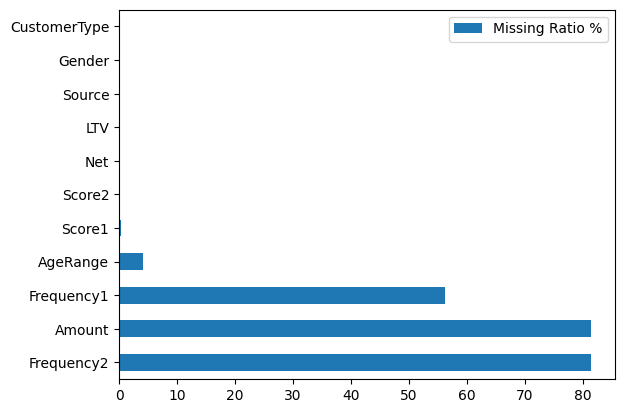

In [3]:
import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)


## Análise de Correlação

In [5]:
dfCars = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/mtcars.csv")
dfCars

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


<Axes: xlabel='cyl', ylabel='mpg'>

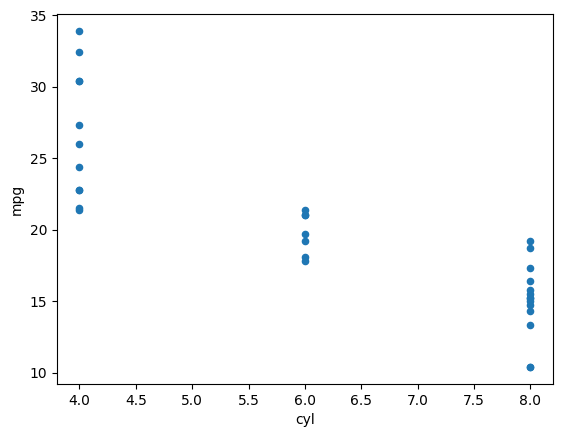

In [6]:
dfCars.plot.scatter(y='mpg', x='cyl')

<Axes: xlabel='hp', ylabel='mpg'>

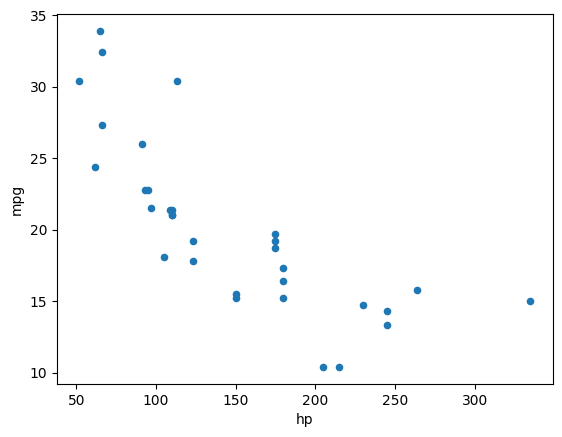

In [7]:
dfCars.plot.scatter(y='mpg', x='hp')

<Axes: xlabel='wt', ylabel='mpg'>

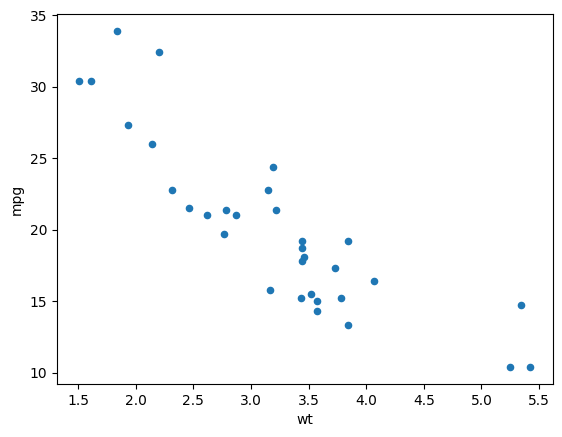

In [8]:
dfCars.plot.scatter(y='mpg', x='wt')

In [11]:
# Matriz de correlação
dfCars.corr()

<ipython-input-11-d5dce61a710b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfCars.corr()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073
